In [ ]:
#Rishabh Jain(19csu247)


#1) find the pearson correlation cofficient and apply chi square test withoout normlization and with missing values
#2) do the same with normalization and without missing values 
#3) compare the result

In [ ]:
#1) https://ipython-books.github.io/74-estimating-the-correlation-between-two-variables-with-a-contingency-table-and-a-chi-squared-test/

#We will generate 1,000 samples of two two variables with a strong positive correlation. The first variable will be random 
#numbers drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 20. The second variable will be 
#values from the first variable with Gaussian noise added with a mean of a 50 and a standard deviation of 10.

#We will use the randn() function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, 
#then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.



data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


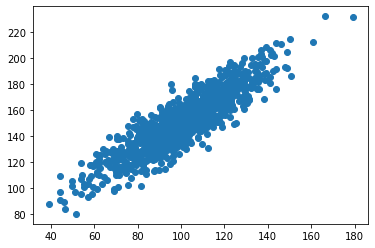

In [1]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# number generator
seed(1)
# data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

In [2]:
# cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)


# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


In [3]:
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


In [ ]:
 # the two variables are positively correlated
 # This tells a high level of correlation
#  A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 
    #indicates a notable correlation, and values below those values suggests a less notable correlation.",

In [24]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
player = 'Roger Federer'
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'federer.csv?raw=true',
                 parse_dates=['start date'],
                 dayfirst=True)
print(f"Number of columns: {len(df.columns)}")
df[df.columns[:4]].tail()

Number of columns: 70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",2012-01-16,GS
1175,2012,"Doha, Qatar",2012-01-02,250
1176,2012,"Doha, Qatar",2012-01-02,250
1177,2012,"Doha, Qatar",2012-01-02,250
1178,2012,"Doha, Qatar",2012-01-02,250


(0.0, 0.1629310344827586)

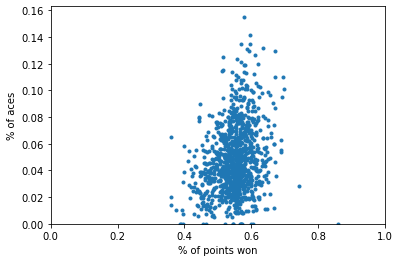

In [25]:
# we only look at the proportion of points won, and the (relative) number of aces:
npoints = df['player1 total points total']
points = df['player1 total points won'] / npoints
aces = df['player1 aces'] / npoints
fig, ax = plt.subplots(1, 1)
ax.plot(points, aces, '.')
ax.set_xlabel('% of points won')
ax.set_ylabel('% of aces')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

In [26]:
df_bis = pd.DataFrame({'points': points,
                       'aces': aces}).dropna()
df_bis.tail()


,points,aces
1173,0.585366,0.024390
1174,0.471014,0.039855
1175,0.639535,0.046512
1176,0.606061,0.020202
1177,0.531792,0.069364


In [27]:
df_bis.corr()

,points,aces
points,1.000000,0.255457
aces,0.255457,1.000000


In [ ]:
# correlation of ~0.26 seems to indicate a positive correlation between our two variables. 
#  significant correlation between the variables, we use a chi-squared test of the independence of variables in a contingency table.

In [28]:
df_bis['result'] = (df_bis['points'] >
                    df_bis['points'].median())
df_bis['manyaces'] = (df_bis['aces'] >
                      df_bis['aces'].median())
pd.crosstab(df_bis['result'], df_bis['manyaces'])


manyaces,False,True
result,,
False,300,214
True,214,299


In [30]:
scipy.stats.chi2_contingency()

TypeError: chi2_contingency() missing 1 required positional argument: 'observed'